In [12]:
import numpy as np
import pygad

# 問題の設定
num_workers = 5
num_tasks = 10
num_time_slots = 8

# タスクの時間枠と所要時間（ランダムに生成）
tasks = np.random.randint(1, num_time_slots, size=(num_tasks, 2))

# 適応度関数
def fitness_func(ga, solution, solution_idx):
    schedule = solution.reshape((num_workers, num_time_slots))
    penalty = 0
    completed_tasks = 0

    for task_id, (start_time, duration) in enumerate(tasks):
        worker = np.where(
            schedule[:, start_time : start_time + duration] == task_id + 1
        )[0]
        if len(worker) == 1 and np.all(
            schedule[worker[0], start_time : start_time + duration] == task_id + 1
        ):
            completed_tasks += 1
        else:
            penalty += 1

    return completed_tasks - penalty


# 遺伝的アルゴリズムの設定
num_generations = 100
num_parents_mating = 4
population_size = 50

ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    num_genes=num_workers * num_time_slots,
    init_range_low=0,
    init_range_high=num_tasks + 1,
    mutation_percent_genes=10,
    mutation_type="random",
    mutation_by_replacement=True,
    random_mutation_min_val=0,
    random_mutation_max_val=num_tasks + 1,
    sol_per_pop=population_size,
)

# 遺伝的アルゴリズムの実行
ga_instance.run()

# 最良の解を取得
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Best fitness: {solution_fitness}")

# 最良のスケジュールを表示
best_schedule = solution.reshape((num_workers, num_time_slots))
print("Best schedule:")
print(best_schedule)

# 結果の検証
for task_id, (start_time, duration) in enumerate(tasks):
    worker = np.where(
        best_schedule[:, start_time : start_time + duration] == task_id + 1
    )[0]
    if len(worker) == 1 and np.all(
        best_schedule[worker[0], start_time : start_time + duration] == task_id + 1
    ):
        print(
            f"Task {task_id+1} assigned to worker {worker[0]+1} from time {start_time} to {start_time+duration}"
        )
    else:
        print(f"Task {task_id+1} not properly assigned")

Best fitness: -10
Best schedule:
[[ 6.64040587  3.17311905  0.51132491  9.53230672  8.63410052  5.44680759
   6.70255413  5.63395326]
 [ 9.5048094  10.22796019 10.34155617  9.74930638  5.19750049  7.81362245
   9.8200436   9.57949416]
 [ 0.72661212  9.15184154  8.58803438  8.04541387 10.95484949  9.524287
   5.86192755  7.42472292]
 [ 5.97395537  6.08580317  0.4178901  10.4614732   2.80178292 10.71931691
   8.72967579  2.89766312]
 [ 8.02582378  0.54483629  5.88981186 10.28794212 10.62525513  4.75539635
   6.05486777  2.24622828]]
Task 1 not properly assigned
Task 2 not properly assigned
Task 3 not properly assigned
Task 4 not properly assigned
Task 5 not properly assigned
Task 6 not properly assigned
Task 7 not properly assigned
Task 8 not properly assigned
Task 9 not properly assigned
Task 10 not properly assigned


/Users/yukiya/ws/caredx2024_rapid_prototyping/.venv/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


/var/folders/6h/jm2jl70d5sjcxnpkzl38w5nw0000gn/T/ipykernel_61638/3531380864.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20')


TypeError: list indices must be integers or slices, not numpy.float64

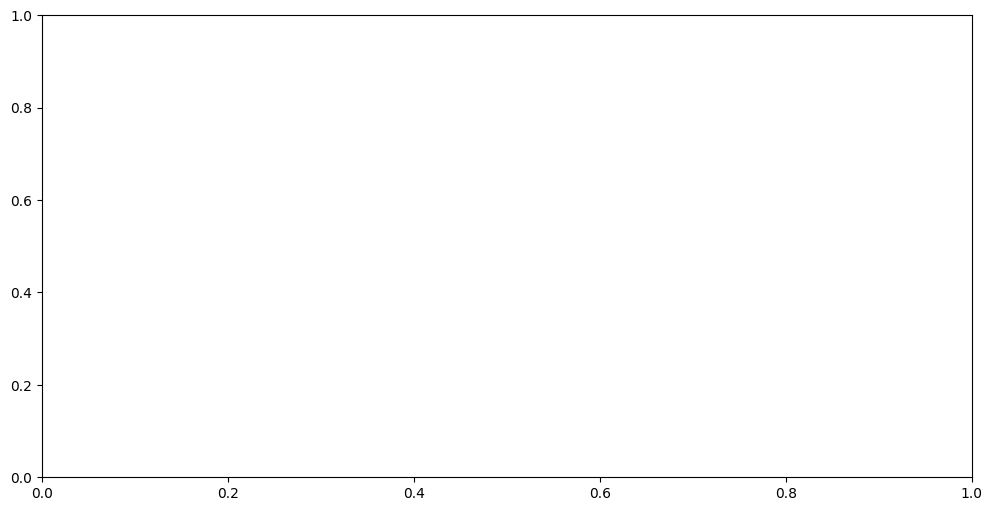

In [10]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# シフト表の可視化


def visualize_schedule(schedule, tasks):
    fig, ax = plt.subplots(figsize=(12, 6))

    # カラーマップの設定
    cmap = plt.cm.get_cmap("tab20")
    colors = [cmap(i) for i in np.linspace(0, 1, num_tasks + 1)]
    colors[0] = (1, 1, 1, 1)  # 0（未割り当て）は白色に設定

    # シフト表の描画
    for worker in range(num_workers):
        for time in range(num_time_slots):
            task = schedule[worker, time]
            ax.add_patch(
                plt.Rectangle((time, worker), 1, 1, fill=True, color=colors[task])
            )
            if task != 0:
                ax.text(time + 0.5, worker + 0.5, str(task), ha="center", va="center")

    # タスクの時間枠を表示
    for task_id, (start_time, duration) in enumerate(tasks):
        ax.add_patch(
            plt.Rectangle(
                (start_time, -0.5),
                duration,
                0.4,
                fill=False,
                edgecolor="red",
                linewidth=2,
            )
        )
        ax.text(
            start_time + duration / 2,
            -0.3,
            f"T{task_id+1}",
            ha="center",
            va="center",
            color="red",
        )

    ax.set_xlim(0, num_time_slots)
    ax.set_ylim(-0.5, num_workers)
    ax.set_xticks(range(num_time_slots + 1))
    ax.set_yticks(range(num_workers))
    ax.set_yticklabels([f"Worker {i+1}" for i in range(num_workers)])
    ax.set_xlabel("Time Slots")
    ax.set_title("Home Care Crew Schedule")

    plt.tight_layout()
    plt.show()


# 最良のスケジュールを可視化
visualize_schedule(best_schedule, tasks)

Random schedule:
[[10 10  4  0  1  6  6  4]
 [ 7  1  5  1  9  0  8 10]
 [ 3  5  5  2  2  7  3  5]
 [ 2  6  1  8  9  3 10  8]
 [ 3  4  3  8  0  2  2  9]]


/var/folders/6h/jm2jl70d5sjcxnpkzl38w5nw0000gn/T/ipykernel_61638/3531380864.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20')


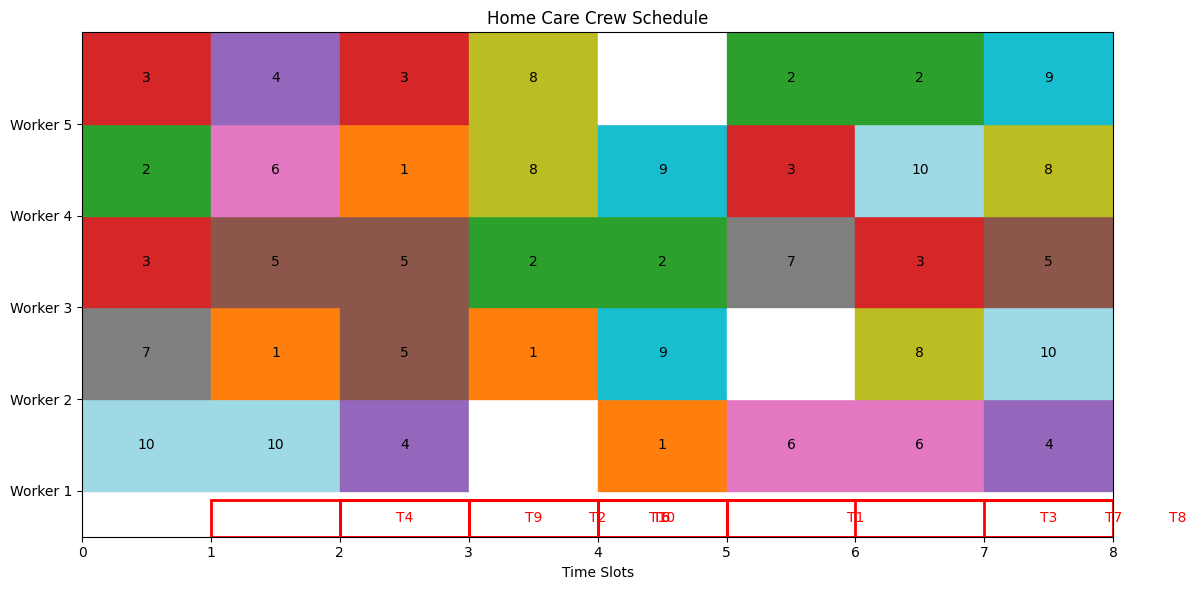


Verification of random schedule:
Task 1 not properly assigned
Task 2 not properly assigned
Task 3 not properly assigned
Task 4 assigned to worker 1 from time 2 to 3
Task 5 not properly assigned
Task 6 not properly assigned
Task 7 not properly assigned
Task 8 not properly assigned
Task 9 not properly assigned
Task 10 not properly assigned


In [3]:
# ランダムなスケジュールの生成
random_schedule = np.random.randint(
    0, num_tasks + 1, size=(num_workers, num_time_slots)
)

print("Random schedule:")
print(random_schedule)

# ランダムなスケジュールの可視化
visualize_schedule(random_schedule, tasks)

# 結果の検証（ランダムスケジュール）
print("\nVerification of random schedule:")
for task_id, (start_time, duration) in enumerate(tasks):
    worker = np.where(
        random_schedule[:, start_time : start_time + duration] == task_id + 1
    )[0]
    if len(worker) == 1 and np.all(
        random_schedule[worker[0], start_time : start_time + duration] == task_id + 1
    ):
        print(
            f"Task {task_id+1} assigned to worker {worker[0]+1} from time {start_time} to {start_time+duration}"
        )
    else:
        print(f"Task {task_id+1} not properly assigned")

In [13]:
import numpy as np
import pygad
import matplotlib.pyplot as plt

# 問題の設定
num_salesmen = 5  # セールスマンの数 N
num_nodes = 20    # ノードの数 M
num_cities = num_nodes - 1  # 出発地点を除いた訪問すべき都市の数

# ランダムな座標を生成
coordinates = np.random.rand(num_nodes, 2) * 100

# 距離行列の計算
distance_matrix = np.sqrt(((coordinates[:, None, :] - coordinates[None, :, :]) ** 2).sum(axis=2))

# 適応度関数
def fitness_func(ga_instance, solution, solution_idx):
    total_distance = 0
    for i in range(num_salesmen):
        salesman_route = solution[i * num_cities:(i + 1) * num_cities]
        route = np.concatenate(([0], salesman_route, [0]))  # 各セールスマンは0（出発地点）から始まり0に戻る
        route_distance = sum(distance_matrix[route[j], route[j+1]] for j in range(len(route) - 1))
        total_distance += route_distance
    return 1 / (total_distance + 1e-10)  # 距離の逆数を返す（距離が短いほど適応度が高い）

# 遺伝的アルゴリズムの設定
num_generations = 1000
num_parents_mating = 4
population_size = 100

ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    num_genes=num_salesmen * num_cities,
    init_range_low=1,
    init_range_high=num_nodes,
    mutation_percent_genes=10,
    mutation_type="random",
    mutation_by_replacement=True,
    random_mutation_min_val=1,
    random_mutation_max_val=num_nodes,
    crossover_type="single_point",
    sol_per_pop=population_size,
)

# 遺伝的アルゴリズムの実行
ga_instance.run()

# 最良の解を取得
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Best fitness: {solution_fitness}")

# 結果の可視化
plt.figure(figsize=(12, 8))
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='red', s=50)
for i, (x, y) in enumerate(coordinates):
    plt.annotate(str(i), (x, y), xytext=(5, 5), textcoords='offset points')

colors = plt.cm.rainbow(np.linspace(0, 1, num_salesmen))
for i in range(num_salesmen):
    salesman_route = solution[i * num_cities:(i + 1) * num_cities]
    route = np.concatenate(([0], salesman_route, [0]))
    for j in range(len(route) - 1):
        start = coordinates[route[j]]
        end = coordinates[route[j+1]]
        plt.plot([start[0], end[0]], [start[1], end[1]], c=colors[i], linewidth=2, alpha=0.8)

plt.title("Multiple Traveling Salesman Problem Solution")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()

# 各セールスマンの経路と総距離を表示
total_distance = 0
for i in range(num_salesmen):
    salesman_route = solution[i * num_cities:(i + 1) * num_cities]
    route = np.concatenate(([0], salesman_route, [0]))
    route_distance = sum(distance_matrix[route[j], route[j+1]] for j in range(len(route) - 1))
    total_distance += route_distance
    print(f"Salesman {i+1} route: {' -> '.join(map(str, route))}")
    print(f"Salesman {i+1} distance: {route_distance:.2f}")

print(f"\nTotal distance: {total_distance:.2f}")

only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Traceback (most recent call last):
  File "/Users/yukiya/ws/caredx2024_rapid_prototyping/.venv/lib/python3.11/site-packages/pygad/pygad.py", line 1708, in cal_pop_fitness
    fitness = self.fitness_func(self, sol, sol_idx)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/6h/jm2jl70d5sjcxnpkzl38w5nw0000gn/T/ipykernel_61638/3961410578.py", line 22, in fitness_func
    route_distance = sum(distance_matrix[route[j], route[j+1]] for j in range(len(route) - 1))
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/6h/jm2jl70d5sjcxnpkzl38w5nw0000gn/T/ipykernel_61638/3961410578.py", line 22, in <genexpr>
    route_distance = sum(distance_matrix[route[j], route[j+1]] for j in range(len(route) - 1))
                         ~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
IndexError: only integers, slices 

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices